In [1]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/juanjaramillo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
beef = pd.read_csv('./ML/beef.csv')

In [3]:
beef.head(10)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000
5,1978,2,21.7602,182.5333
6,1978,3,21.6064,186.2000
7,1978,4,21.8814,186.4333
8,1979,1,20.5086,211.7000
9,1979,2,19.0408,231.5000


In [4]:
beef.isnull().sum()

Year        0
Quarter     0
Quantity    0
Price       0
dtype: int64

## Regression Analysis

### Ordinary Least Squares (OLS) Estimation

In [5]:
beef_model = ols("Quantity ~ Price", data=beef).fit()

In [6]:
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.69e-46
Time:                        23:14:06   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

The small P values indicate that we can reject the null hypothesis that Price has no effect on Quantity.

Hight r squared indicates that our model explains a lot of the response variability.

In regression analysis, we'd like our regression model to have significant variables and to produce a high R-squared value.

We will show graphs to help interpret regression analysis results more intuitively.

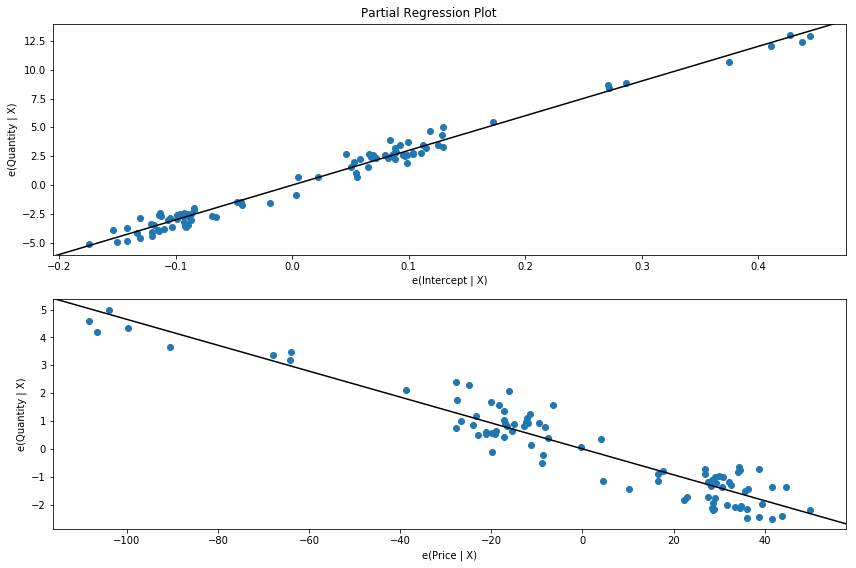

In [7]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(beef_model, fig=fig)